# **DATA ANALYSIS**

In [1]:
##Importing python libraries

#Data Preprocessing
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler as ss

#Data Visualization
import plotly.express as px
from plotly.subplots import make_subplots
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#Machine Learning Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import lightgbm as lgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Model Training and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, confusion_matrix , precision_score, recall_score
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_auc_score
from sklearn import model_selection
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


# %matplotlib inline

In [2]:
#Enabling GPU support for more computationally demanding tasks.

import tensorflow as tf
tf.test.gpu_device_name()

''

In [3]:
df = pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
print(df)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.shape

(299, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [8]:
df.tail(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
289,90.0,1,337,0,38,0,390000.0,0.9,144,0,0,256,0
290,45.0,0,615,1,55,0,222000.0,0.8,141,0,0,257,0
291,60.0,0,320,0,35,0,133000.0,1.4,139,1,0,258,0
292,52.0,0,190,1,38,0,382000.0,1.0,140,1,1,258,0
293,63.0,1,103,1,35,0,179000.0,0.9,136,1,1,270,0
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [9]:
df.dtypes

,0
age,float64
anaemia,int64
creatinine_phosphokinase,int64
diabetes,int64
ejection_fraction,int64
high_blood_pressure,int64
platelets,float64
serum_creatinine,float64
serum_sodium,int64
sex,int64


In [10]:
df.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [11]:

df.duplicated().sum()

0

In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# **DATA VISUALIZATION**

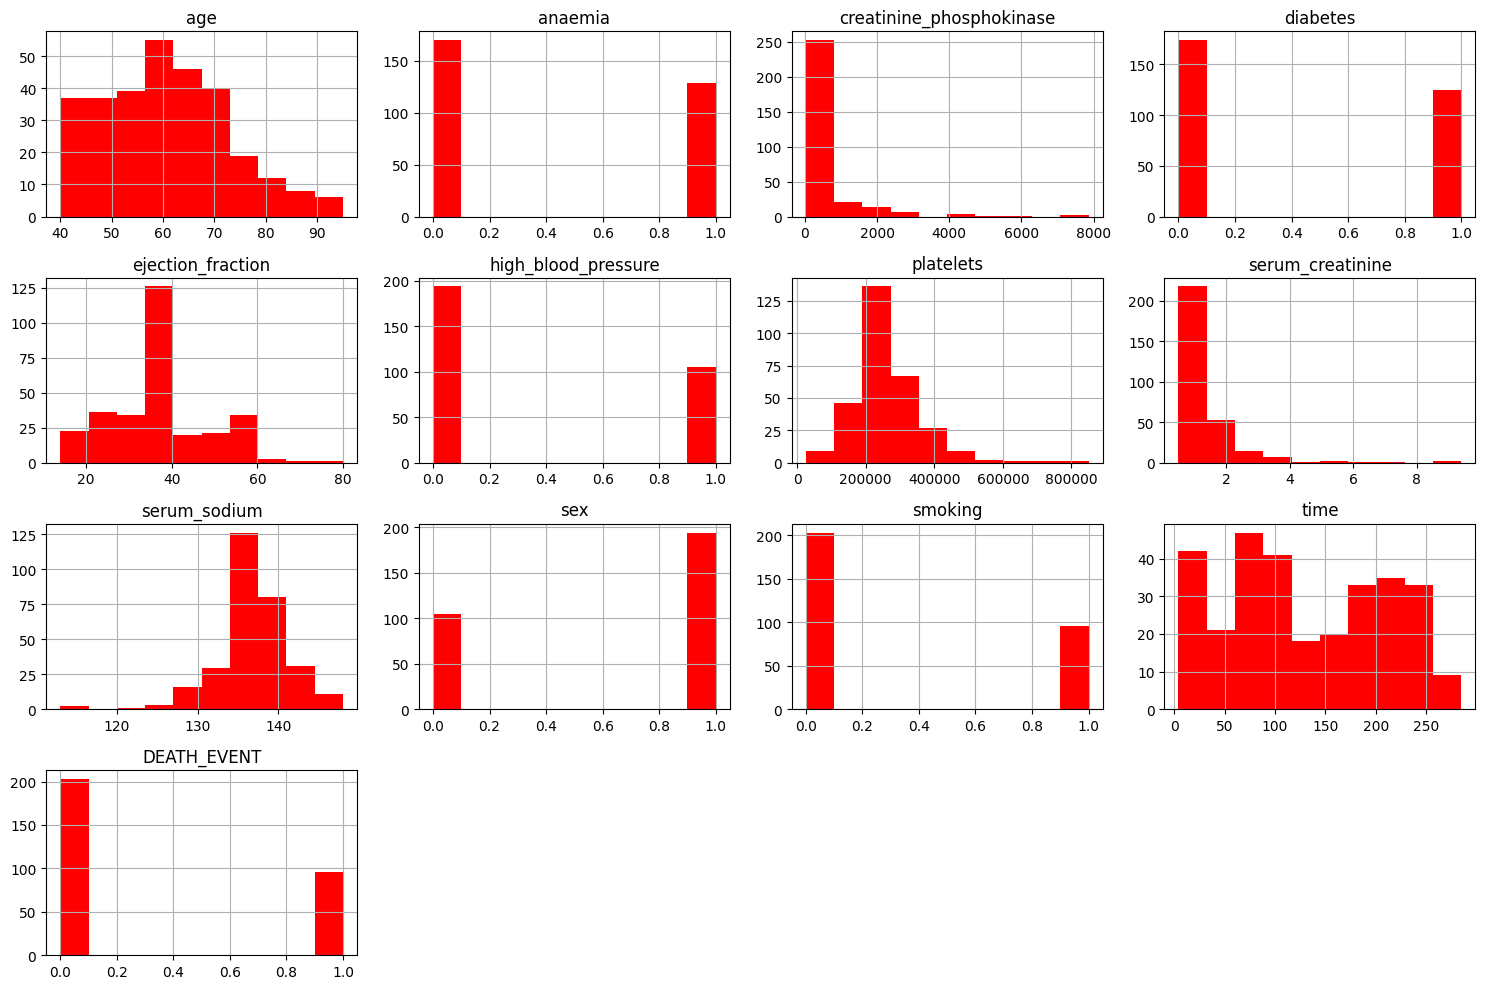

In [13]:
#Displaying values of different columns of dataset
df.hist(bins=10, figsize=(15, 10), color="red")
plt.tight_layout()

In [14]:
 #creating a copy of the dataset for visualization
dv= df.copy()

#Changing values 1, 0 to have the issue or not
dv['anaemia'] = np.where(dv['anaemia'] == 1, 'Anaemic', 'Non-Anaemic')
dv['diabetes'] = np.where(dv['diabetes'] == 1, 'Diabetic', 'Non-Diabetic')
dv['high_blood_pressure'] = np.where(dv['high_blood_pressure'] == 1, 'High', 'Normal')
dv['sex'] = np.where(dv['sex'] == 1, 'Male', 'Female')
dv['smoking'] = np.where(dv['smoking'] == 1, 'Smoker', 'Non-Smoker')
dv['DEATH_EVENT'] = np.where(dv['DEATH_EVENT'] == 0, 'Alive', 'Deceased')

#explore first five rows in the dataset
dv.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,Non-Anaemic,582,Non-Diabetic,20,High,265000.00,1.9,130,Male,Non-Smoker,4,Deceased
1,55.0,Non-Anaemic,7861,Non-Diabetic,38,Normal,263358.03,1.1,136,Male,Non-Smoker,6,Deceased
2,65.0,Non-Anaemic,146,Non-Diabetic,20,Normal,162000.00,1.3,129,Male,Smoker,7,Deceased
3,50.0,Anaemic,111,Non-Diabetic,20,Normal,210000.00,1.9,137,Male,Non-Smoker,7,Deceased
4,65.0,Anaemic,160,Diabetic,20,Normal,327000.00,2.7,116,Female,Non-Smoker,8,Deceased


In [15]:
#Visualizing Age, level of serum creatinine, level of serum sodium and ejection fraction
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Age", "Level of serum creatinine", "Level of serum sodium", "Ejection fraction"))

#Age
fig.add_trace(go.Histogram(x=dv.age[dv['DEATH_EVENT'] == 'Deceased'], name='Deceased',
                          marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           xbins=dict(size=10 )),
                           row=1, col=1)
#Age
fig.add_trace(go.Histogram(x=dv.age[dv['DEATH_EVENT'] == 'Alive'], name='Alive',
                          marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           xbins=dict(size=10 )),row=1, col=1)
##level of serum creatinine
fig.add_trace(go.Histogram(x=dv.serum_creatinine[dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25)),row=1, col=2)
##level of serum creatinine
fig.add_trace(go.Histogram(x=dv.serum_creatinine[dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25 )),row=1, col=2)
##level of serum sodium
fig.add_trace(go.Histogram(x=dv.serum_sodium[dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25)),row=1, col=3)
##level of serum sodium
fig.add_trace(go.Histogram(x=dv.serum_sodium[dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=25 )),row=1, col=3)
#Ejection Fraction
fig.add_trace(go.Histogram(x=dv.ejection_fraction [dv['DEATH_EVENT'] == 'Deceased'],
                           marker=dict(color='#d5a036', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=5 )),row=1, col=4)
#Ejection Fraction
fig.add_trace(go.Histogram(x=dv.ejection_fraction [dv['DEATH_EVENT'] == 'Alive'],
                           marker=dict(color='#1984c5', line=dict(width=1.5, color='#000000')),
                           showlegend=False,xbins=dict(size=5 )),row=1, col=4)
#Tittle config
fig.update_layout(title_x=0.5,title_text="Heart failure deaths distribution by:", height=400,barmode='stack',font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=12),paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
#config opacity
fig.update_traces(opacity=0.80)

fig.show()

In [16]:
#Visualizing the median values of the above columns

#creating variable with median age, median level of sodium creatinine and median ejection_fraction
median_age=dv.groupby('DEATH_EVENT')['age'].median()
median_creatinine=dv.groupby('DEATH_EVENT')['serum_creatinine'].median()
median_sodium=dv.groupby('DEATH_EVENT')['serum_sodium'].median()
median_ejection_fraction=dv.groupby('DEATH_EVENT')['ejection_fraction'].median()
#reset index and sort values
median_age = median_age.reset_index().sort_values('age', ascending=False)
median_creatinine = median_creatinine.reset_index().sort_values('serum_creatinine',ascending=False )
median_sodium = median_sodium.reset_index().sort_values('serum_sodium')
median_ejection_fraction =median_ejection_fraction.reset_index().sort_values('ejection_fraction')
x_value = median_age.DEATH_EVENT

#making the plots
fig = make_subplots(
    rows=1, cols=4,
    subplot_titles=("Age", "Level of serum creatinine", "Level of serum sodium", "Ejection fraction"))

#create bar plot

#Age
fig.add_trace(go.Bar(x=x_value,y=median_age.age, text=median_age.age,textposition='outside',showlegend=False,
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=1)

#Serum creatinine
fig.add_trace(go.Bar(x=x_value,y=median_creatinine.serum_creatinine, text=median_creatinine.serum_creatinine,
                     showlegend=False, textposition='outside',
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=2)

#Serum sodium
fig.add_trace(go.Bar(x=x_value,y=median_sodium.serum_sodium, text=median_sodium.serum_sodium,
                     showlegend=False, textposition='outside',
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=3)

#ejection fraction
fig.add_trace(go.Bar(x=x_value,y=median_ejection_fraction.ejection_fraction, text=median_ejection_fraction.ejection_fraction,textposition='outside',showlegend=False,
          marker=dict(color=['#d5a036', '#1984c5'],line=dict(width=1.5, color='#000000'), opacity=0.9)),row=1, col=4)

#bar plot config
fig.update_layout(title_x=0.5,title_text="Median Values of:", height=450,font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=13),paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')
#bar plot config
fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                 marker_line_width=1.5,marker_line_color="black")

#config space subtitles
for i in range(0,4):
    fig.layout.annotations[i].update(y=1.05)

#bar plot config
fig.update_xaxes(showline=True, linewidth=1, linecolor='black')

fig.show()

Text(0.5, 1.0, 'Relationship between Platelets count and heart failure deaths')

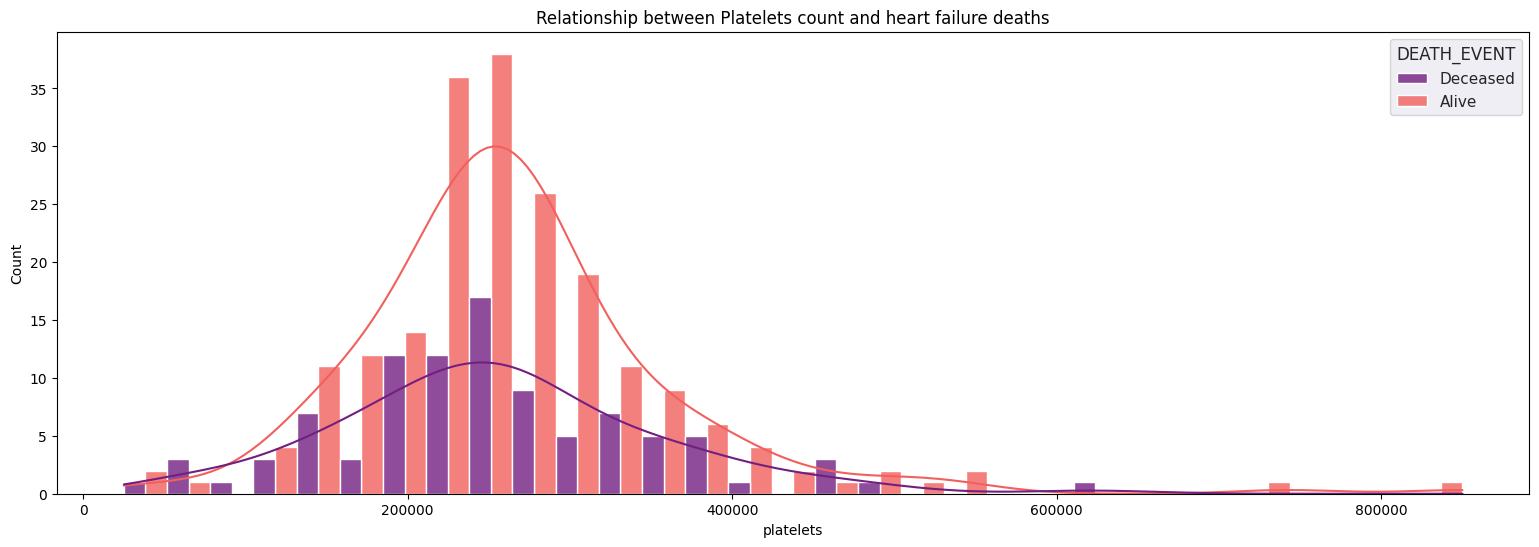

In [17]:
#Visualizing the effect of platelets count
fig, axes = plt.subplots(1,1, figsize=(19,6))
sns.set()
sns.histplot(data=dv, x="platelets", alpha=0.8, hue = "DEATH_EVENT",kde=True, multiple="dodge", palette="magma")
plt.title("Relationship between Platelets count and heart failure deaths")


<ipython-input-18-02c020a97b5e>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




Text(0.5, 1.0, 'Relationship between Creatinine Phosphokinase and heart failure deaths')

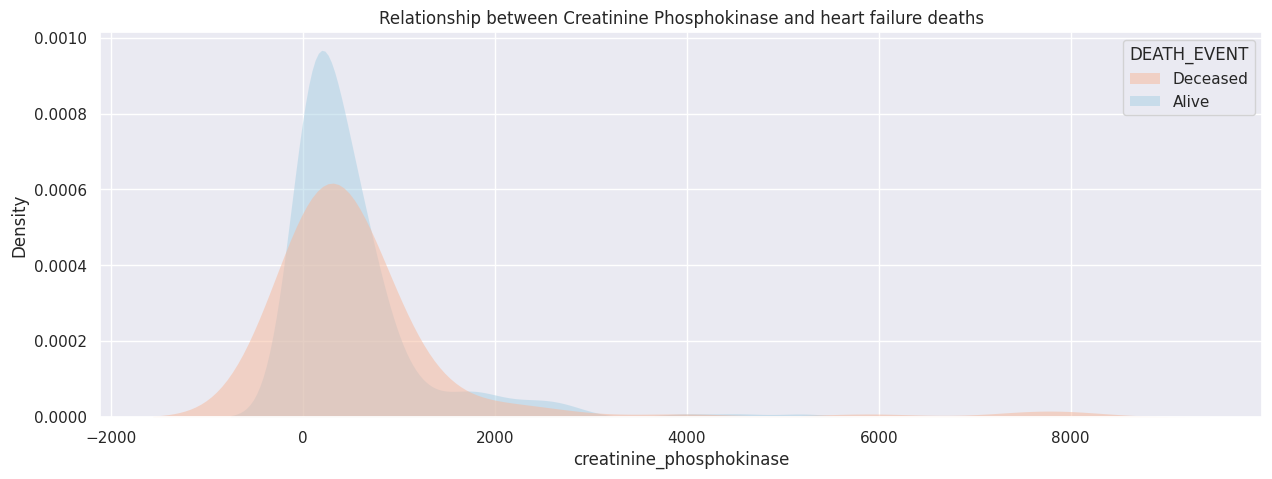

In [18]:
#Visualizing the effect of creatinine phosphokinase count
fig, axes = plt.subplots(1,1, figsize=(15,5))
sns.set()
sns.kdeplot(x=dv["creatinine_phosphokinase"], hue=dv["DEATH_EVENT"], common_norm=False, palette="RdBu",
   alpha=.5, linewidth=0, shade=True)
plt.title("Relationship between Creatinine Phosphokinase and heart failure deaths")


In [19]:
# Visualizing all the boolean columns

visu = pd.DataFrame()
#variable with 0 for the iteration
num = 0
#variable with the name of columns
variables = ['sex','high_blood_pressure','anaemia','diabetes','smoking']
#for loop to get the percentage of columns
for i in variables:
    num += 1
    temp = dv.groupby(i)['DEATH_EVENT'].value_counts(normalize=True)
    temp = temp.mul(100).rename('percentage' + str(num)).reset_index()
    visu = pd.concat([visu, temp], axis=1)

#drop diplicated values
visu = visu.loc[:, ~visu.columns.duplicated()]
visu = visu.round(decimals = 2)
#colors for the visualizations
color_rgb = ['rgb(25, 132, 197)','rgb(213, 160, 54)']
num = 0
#loop for creating visualizations
for i in variables:
    num +=1
    fig = px.histogram(visu, x=i, y='percentage' + str(num),
             color='DEATH_EVENT', barmode='group',
             text_auto=True,
             height=450, width = 600,color_discrete_sequence= color_rgb,opacity=0.8)
    #config plot
    fig.update_layout(title_x=0.5,title_text=(f"Heart failure deaths distribution by {i}"), height=450,font_family='Verdana',
                 font=dict(family="Verdana,Verdana",size=13),yaxis_title=None, xaxis_title= i,
                      paper_bgcolor='#edeae7',plot_bgcolor='#edeae7')

     #config plot
    fig.update_traces(textfont_size=14, textangle=0, textposition="outside", cliponaxis=False,
                 marker_line_width=1,marker_line_color="black")
    fig.update_yaxes(title="", ticksuffix='%')
    fig.show()


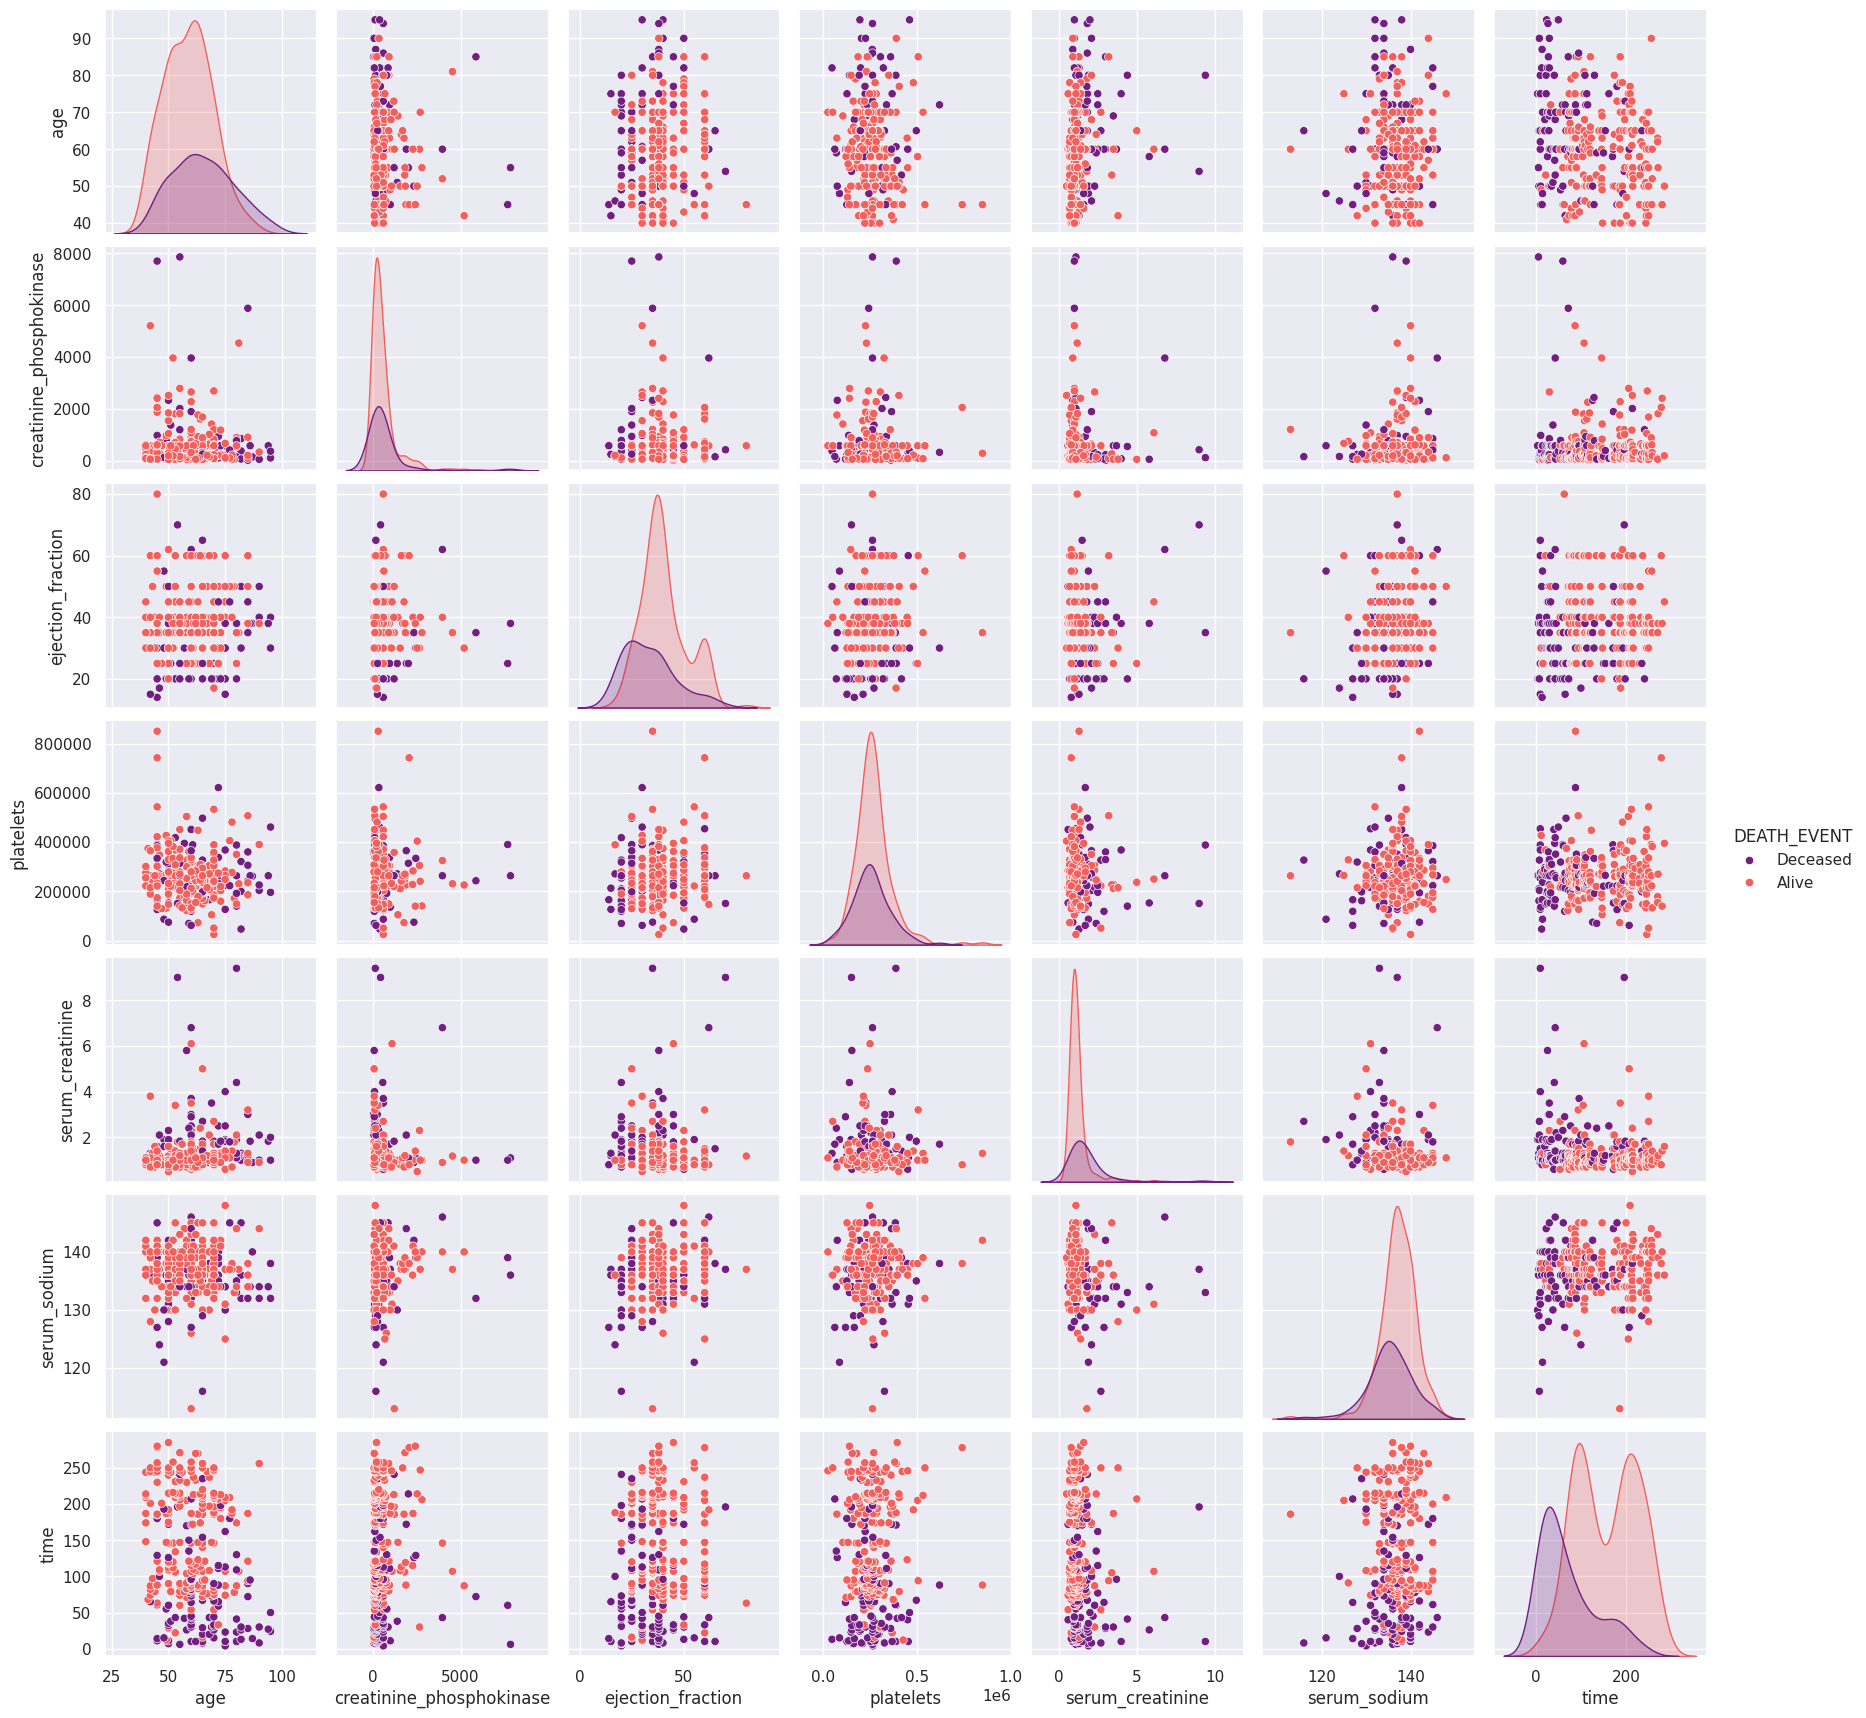

In [20]:
sns.pairplot(dv,hue='DEATH_EVENT',palette='magma')

In [21]:
df.describe()[:].T.style.background_gradient(cmap='magma')

,count,mean,std,min,25%,50%,75%,max
age,299.000000,60.833893,11.894809,40.000000,51.000000,60.000000,70.000000,95.000000
anaemia,299.000000,0.431438,0.496107,0.000000,0.000000,0.000000,1.000000,1.000000
creatinine_phosphokinase,299.000000,581.839465,970.287881,23.000000,116.500000,250.000000,582.000000,7861.000000
diabetes,299.000000,0.418060,0.494067,0.000000,0.000000,0.000000,1.000000,1.000000
ejection_fraction,299.000000,38.083612,11.834841,14.000000,30.000000,38.000000,45.000000,80.000000
high_blood_pressure,299.000000,0.351171,0.478136,0.000000,0.000000,0.000000,1.000000,1.000000
platelets,299.000000,263358.029264,97804.236869,25100.000000,212500.000000,262000.000000,303500.000000,850000.000000
serum_creatinine,299.000000,1.393880,1.034510,0.500000,0.900000,1.100000,1.400000,9.400000
serum_sodium,299.000000,136.625418,4.412477,113.000000,134.000000,137.000000,140.000000,148.000000
sex,299.000000,0.648829,0.478136,0.000000,0.000000,1.000000,1.000000,1.000000


In [22]:
fig = px.imshow(df.corr(), color_continuous_scale="magma")
fig.update_layout(height=750)
fig.show()

# **Machine Learning Models**

In [23]:
x=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [25]:
from sklearn.preprocessing import StandardScaler as ss
scs = ss()
x_train = scs.fit_transform(x_train)
x_test = scs.transform(x_test)
model_test={}

# **Logistic Regression**

In [26]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred_test= lr.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [28]:
y_pred_train= lr.predict(x_train)
y_pred_train

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [29]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Training accuracy:
86.61087866108787
Testing accuracy:
78.33333333333333


# **Confusion Matrix**

In [30]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [31]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[36  1]
 [12 11]]

True Positives(TP) =  36

True Negatives(TN) =  11

False Positives(FP) =  1

False Negatives(FN) =  12


<Axes: >

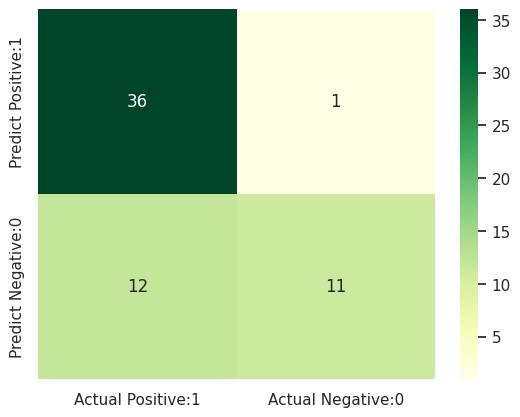

In [32]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.85        37
           1       0.92      0.48      0.63        23

    accuracy                           0.78        60
   macro avg       0.83      0.73      0.74        60
weighted avg       0.81      0.78      0.76        60



In [34]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [35]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2167


In [36]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['Logistic Regression']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6285714285714286
Accuracy: 0.7833333333333333
Recall : 0.4782608695652174
Precision : 0.9166666666666666
ROC_AUC : 0.7256169212690952


# **Random Forest**

In [37]:
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
y_pred_test= clf.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [39]:
y_pred_train= clf.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [40]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Training accuracy:
100.0
Testing accuracy:
86.66666666666667


# **Confusion Matrix**

In [41]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)


print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[36  1]
 [ 7 16]]

True Positives(TP) =  36

True Negatives(TN) =  16

False Positives(FP) =  1

False Negatives(FN) =  7


<Axes: >

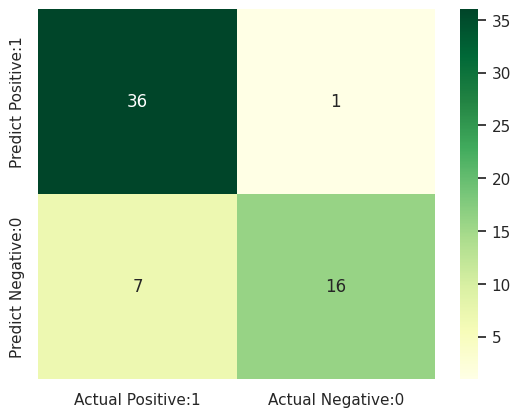

In [42]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [43]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90        37
           1       0.94      0.70      0.80        23

    accuracy                           0.87        60
   macro avg       0.89      0.83      0.85        60
weighted avg       0.88      0.87      0.86        60



In [44]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1333


In [45]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['Random Forest']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8
Accuracy: 0.8666666666666667
Recall : 0.6956521739130435
Precision : 0.9411764705882353
ROC_AUC : 0.8343125734430082


# **K Nearest Neighbour (KNN) Classifier**

In [46]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [47]:
y_pred_test = knn.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [48]:
y_pred_train = knn.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [49]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Training accuracy:
82.84518828451883
Testing accuracy:
71.66666666666667


# **Confusion Matrix**

In [50]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)


print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  2]
 [15  8]]

True Positives(TP) =  35

True Negatives(TN) =  8

False Positives(FP) =  2

False Negatives(FN) =  15


<Axes: >

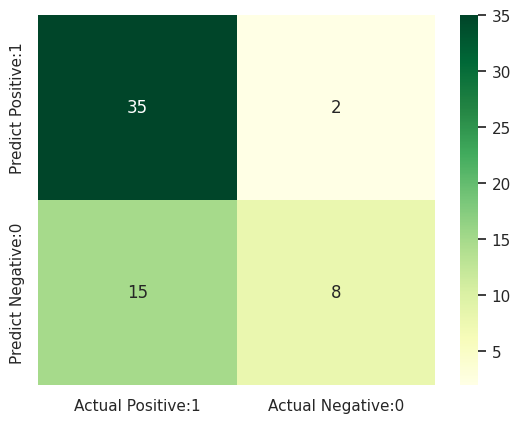

In [51]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.95      0.80        37
           1       0.80      0.35      0.48        23

    accuracy                           0.72        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.74      0.72      0.68        60



In [53]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.2833


In [54]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.48484848484848486
Accuracy: 0.7166666666666667
Recall : 0.34782608695652173
Precision : 0.8
ROC_AUC : 0.6468860164512338


# **Decision Tree**

In [55]:
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred_test = tree.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [57]:
y_pred_train = tree.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [58]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Training accuracy:
100.0
Testing accuracy:
75.0


# **Confusion Matrix**

In [59]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [60]:
print('Confusion matrix\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[30  7]
 [ 8 15]]

True Positives(TP) =  30

True Negatives(TN) =  15

False Positives(FP) =  7

False Negatives(FN) =  8


<Axes: >

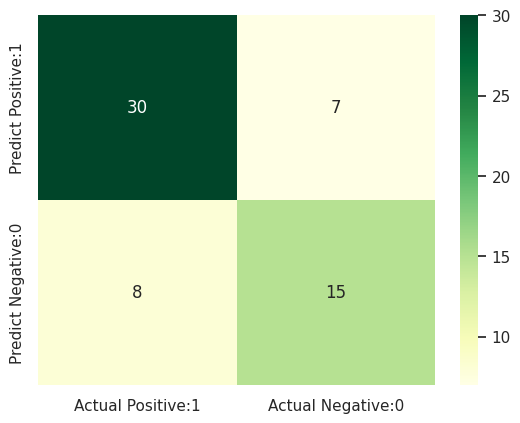

In [61]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')


In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.68      0.65      0.67        23

    accuracy                           0.75        60
   macro avg       0.74      0.73      0.73        60
weighted avg       0.75      0.75      0.75        60



In [64]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]
#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2500


In [65]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['Decision Tree']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.6666666666666666
Accuracy: 0.75
Recall : 0.6521739130434783
Precision : 0.6818181818181818
ROC_AUC : 0.7314923619271445


# **Naive Bayes Classifier**

In [66]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [72]:
y_pred_test = gnb.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [73]:
y_pred_train = gnb.predict(x_train)
y_pred_train

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

In [74]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Training accuracy:
79.07949790794979
Testing accuracy:
68.33333333333333


# **Confusion Matrix**

In [76]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[34  3]
 [16  7]]

True Positives(TP) =  34

True Negatives(TN) =  7

False Positives(FP) =  3

False Negatives(FN) =  16


<Axes: >

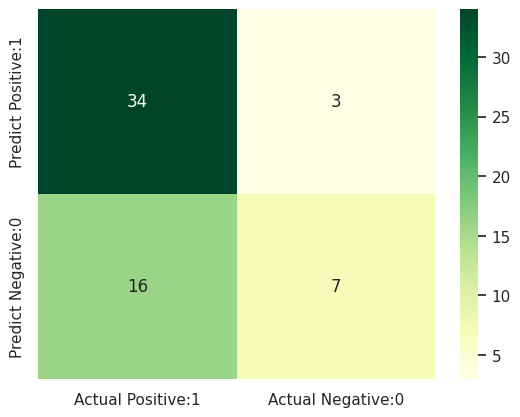

In [77]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')


In [78]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.92      0.78        37
           1       0.70      0.30      0.42        23

    accuracy                           0.68        60
   macro avg       0.69      0.61      0.60        60
weighted avg       0.69      0.68      0.64        60



In [79]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.3167


In [80]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['Naive Bayes']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.42424242424242425
Accuracy: 0.6833333333333333
Recall : 0.30434782608695654
Precision : 0.7
ROC_AUC : 0.6116333725029377


# **SVM**

In [81]:
svm = SVC()
svm.fit(x_train, y_train)

SVC()

In [82]:
y_pred_test = svm.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [83]:
y_pred_train = svm.predict(x_train)
y_pred_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [88]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)


Training accuracy:
90.3765690376569
Testing accuracy:
80.0


# **Confusion Matrix**

In [90]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  2]
 [10 13]]

True Positives(TP) =  35

True Negatives(TN) =  13

False Positives(FP) =  2

False Negatives(FN) =  10


<Axes: >

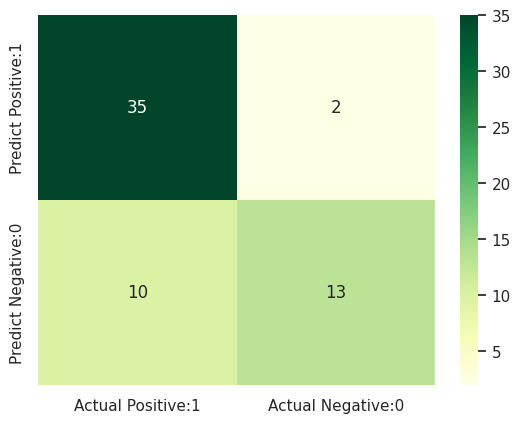

In [91]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        37
           1       0.87      0.57      0.68        23

    accuracy                           0.80        60
   macro avg       0.82      0.76      0.77        60
weighted avg       0.81      0.80      0.79        60



In [93]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2000


# **LightGBM**

In [94]:
lgbm = LGBMClassifier()
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 73, number of negative: 166
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 303
[LightGBM] [Info] Number of data points in the train set: 239, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305439 -> initscore=-0.821528
[LightGBM] [Info] Start training from score -0.821528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



LGBMClassifier()

In [95]:
#Prediction
y_pred_test = lgbm.predict(x_test)
y_pred_test

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



array([0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [96]:
#Prediction
y_pred_train = lgbm.predict(x_train)
y_pred_train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [98]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Training accuracy:
100.0
Testing accuracy:
86.66666666666667


# **Confusion Matrix**

In [99]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)

In [100]:
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[35  2]
 [ 6 17]]

True Positives(TP) =  35

True Negatives(TN) =  17

False Positives(FP) =  2

False Negatives(FN) =  6


<Axes: >

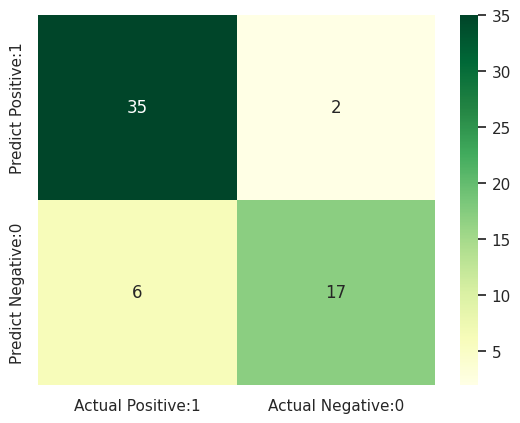

In [101]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        37
           1       0.89      0.74      0.81        23

    accuracy                           0.87        60
   macro avg       0.87      0.84      0.85        60
weighted avg       0.87      0.87      0.86        60



In [103]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1333


In [104]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['LightGBM']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.8095238095238095
Accuracy: 0.8666666666666667
Recall : 0.7391304347826086
Precision : 0.8947368421052632
ROC_AUC : 0.8425381903642772


# **XGBoost**

In [105]:
xg = XGBClassifier()
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred_test = xg.predict(x_test)
y_pred_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [107]:
y_pred_train = xg.predict(x_train)
y_pred_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [108]:
print("Training accuracy:")
print( accuracy_score(y_train, y_pred_train)*100)
print("Testing accuracy:")
print( accuracy_score(y_test, y_pred_test)*100)

Training accuracy:
100.0
Testing accuracy:
81.66666666666667


# **Confusion Matrix**

In [109]:
y_pred = y_pred_test
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix
 [[33  4]
 [ 7 16]]

True Positives(TP) =  33

True Negatives(TN) =  16

False Positives(FP) =  4

False Negatives(FN) =  7


<Axes: >

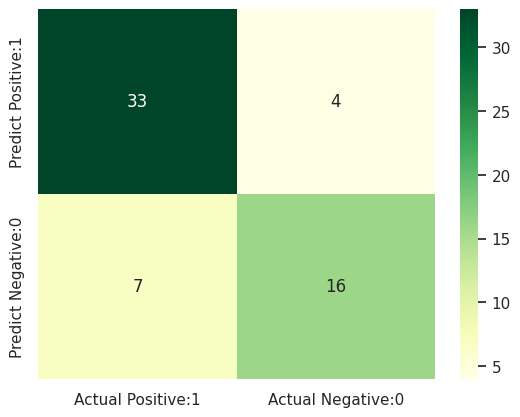

In [110]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGn')

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86        37
           1       0.80      0.70      0.74        23

    accuracy                           0.82        60
   macro avg       0.81      0.79      0.80        60
weighted avg       0.82      0.82      0.81        60



In [112]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#Classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1833


In [113]:
f1score = f1_score(y_test, y_pred)
accuracy= accuracy_score(y_test, y_pred)
precision= precision_score(y_test, y_pred)
recall= recall_score(y_test, y_pred)
roc_auc= roc_auc_score(y_test, y_pred)
model_test['XGBoost']=[f1score , accuracy, precision, recall, classification_error, roc_auc]

print('f1 Score :',f1score)
print('Accuracy:',accuracy)
print('Recall :',recall)
print('Precision :',precision)
print('ROC_AUC :',roc_auc)

f1 Score : 0.7441860465116279
Accuracy: 0.8166666666666667
Recall : 0.6956521739130435
Precision : 0.8
ROC_AUC : 0.7937720329024677


# **MODEL COMPARISON**

In [114]:
#comparing all the model algorithms together
model_test

{'Logistic Regression': [0.6285714285714286,
  0.7833333333333333,
  0.9166666666666666,
  0.4782608695652174,
  0.21666666666666667,
  0.7256169212690952],
 'Random Forest': [0.8,
  0.8666666666666667,
  0.9411764705882353,
  0.6956521739130435,
  0.13333333333333333,
  0.8343125734430082],
 'Naive Bayes': [0.42424242424242425,
  0.6833333333333333,
  0.7,
  0.30434782608695654,
  0.31666666666666665,
  0.6116333725029377],
 'Decision Tree': [0.6666666666666666,
  0.75,
  0.6818181818181818,
  0.6521739130434783,
  0.25,
  0.7314923619271445],
 'LightGBM': [0.8095238095238095,
  0.8666666666666667,
  0.8947368421052632,
  0.7391304347826086,
  0.13333333333333333,
  0.8425381903642772],
 'XGBoost': [0.7441860465116279,
  0.8166666666666667,
  0.8,
  0.6956521739130435,
  0.18333333333333332,
  0.7937720329024677]}

In [115]:
#Mapping the F1 score, accuracy, precision, recall and classification error of all the models
model_comp_df = pd.DataFrame.from_dict(model_test).T
model_comp_df.columns = ['F1 Score','Accuracy','Precision','Recall','Classification Error','ROC AUC Score']
model_comp_df = model_comp_df.sort_values('ROC AUC Score', ascending=True)
model_comp_df.style.background_gradient(cmap='magma')

,F1 Score,Accuracy,Precision,Recall,Classification Error,ROC AUC Score
Naive Bayes,0.424242,0.683333,0.700000,0.304348,0.316667,0.611633
Logistic Regression,0.628571,0.783333,0.916667,0.478261,0.216667,0.725617
Decision Tree,0.666667,0.750000,0.681818,0.652174,0.250000,0.731492
XGBoost,0.744186,0.816667,0.800000,0.695652,0.183333,0.793772
Random Forest,0.800000,0.866667,0.941176,0.695652,0.133333,0.834313
LightGBM,0.809524,0.866667,0.894737,0.739130,0.133333,0.842538


In [116]:
#Plotting the above map

fig = go.Figure(data=[
    go.Bar(name='F1 Score', y=model_comp_df.index, x=model_comp_df['F1 Score'], orientation='h'),
    go.Bar(name='Accuracy', y=model_comp_df.index, x=model_comp_df['Accuracy'], orientation='h'),
    go.Bar(name='Precision', y=model_comp_df.index, x=model_comp_df['Precision'], orientation='h'),
    go.Bar(name='Recall', y=model_comp_df.index, x=model_comp_df['Recall'], orientation='h'),
    go.Bar(name='Classification Error', y=model_comp_df.index, x=model_comp_df['Classification Error'], orientation='h'),
    go.Bar(name='ROC AUC Score', y=model_comp_df.index, x=model_comp_df['ROC AUC Score'], orientation='h')
])
fig.update_layout(autosize=False, width=1100,
    height=800,barmode='group')
fig.show()